# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load CSV File
Use pandas to load the CSV file into a DataFrame.

Note: The max ADC value from the as7341 sensor is: 65535

In [ ]:
import ssl
import requests
import io

# Load CSV File with approximately 41 lines of non-csv metadata
startParsingAtLine = 0 #Normally 41

# Load the CSV file into a DataFrame
# url = 'https://raw.githubusercontent.com/jongarrison/marine_sciences_data/refs/heads/main/kdupro/2025-03-26_disco_bay/2025-03-26_buoy0_usa_discobay_0.5.txt' #Data was flawed, two spurious columns were present

url = 'https://raw.githubusercontent.com/jongarrison/marine_sciences_data/refs/heads/main/kdupro/2025-03-26_disco_bay/2025-03-26_buoy0_usa_discobay_revised.csv'

response = requests.get(url)

print(f"Received response code: {response.status_code}")

print(f"Text:\n{response.text[:1500]}")  # Print the first 1000 characters of the response text

Received response code: 200
Text:
TIME,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
2025-03-26T10:33:05:040Z,2748,4881,7066,8637,9567,8922,10806,9710,27309,4554
2025-03-26T10:33:06:041Z,2818,4949,7136,8718,9617,8956,10847,9770,27352,4635
2025-03-26T10:33:07:040Z,2993,5253,7619,9253,9442,8825,10662,9561,27061,4446
2025-03-26T10:33:08:041Z,2384,4162,5967,7349,8167,7630,9333,8425,22019,3890
2025-03-26T10:33:09:040Z,2294,4031,5770,7108,7384,6867,8447,7773,17982,3539
2025-03-26T10:33:10:041Z,2097,3784,5410,6712,7781,7243,8944,8152,20293,3852
2025-03-26T10:33:11:041Z,2203,3807,5400,6828,6729,6276,7958,7112,17724,3318
2025-03-26T10:33:12:041Z,1277,2385,3320,4139,4713,4270,5667,5335,8658,2508
2025-03-26T10:33:13:041Z,1831,3265,4589,5815,6336,5854,7480,6767,13877,2967
2025-03-26T10:33:14:041Z,1494,2751,3810,4882,6077,5663,7238,6588,12636,2952
2025-03-26T10:33:15:041Z,2247,4047,5788,7171,8159,7627,9395,8583,20395,3897
2025-03-26T10:33:16:041Z,3192,5585,80

In [16]:

df = pd.read_csv(io.StringIO(response.text), header=0, skiprows=startParsingAtLine, skip_blank_lines=True, sep=",") # sep=" ")

display(HTML("<h1>HEAD</h1>"))
# Display the first few rows of the DataFrame
# print(df.head())

# Display the first few rows of the DataFrame without wrapping columns
display(HTML(df.head().to_html()))

display(HTML("<h1>Describe</h1>"))
# Display summary statistics of the DataFrame

display(HTML(df.describe().to_html()))

display(HTML("<h1>Data Types</h1>"))
# Display data types of the DataFrame
print(df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

,TIME,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
0,2025-03-26T10:33:05:040Z,2748,4881,7066,8637,9567,8922,10806,9710,27309,4554
1,2025-03-26T10:33:06:041Z,2818,4949,7136,8718,9617,8956,10847,9770,27352,4635
2,2025-03-26T10:33:07:040Z,2993,5253,7619,9253,9442,8825,10662,9561,27061,4446
3,2025-03-26T10:33:08:041Z,2384,4162,5967,7349,8167,7630,9333,8425,22019,3890
4,2025-03-26T10:33:09:040Z,2294,4031,5770,7108,7384,6867,8447,7773,17982,3539


,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,19299.120664,25754.057818,32564.781800,36329.811463,37850.611865,36669.714932,35733.466566,34344.289593,45711.499246,28995.365510
std,16349.590341,17023.958078,16729.229399,16369.677032,16208.472676,16363.432275,16912.028405,18449.659124,11839.688017,21959.847133
min,8.000000,9.000000,8.000000,10.000000,4.000000,5.000000,5.000000,6.000000,71.000000,86.000000
25%,5917.000000,11791.000000,19614.000000,25345.000000,28158.000000,25327.000000,20565.000000,14050.000000,50601.000000,4741.000000
50%,13529.000000,20536.000000,33604.000000,42168.000000,47193.000000,43632.000000,43974.000000,47705.000000,50601.000000,37814.000000
75%,27671.000000,40908.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000
max,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000


TIME        object
F1-415nm     int64
F2-445nm     int64
F3-480nm     int64
F4-515nm     int64
F5-555nm     int64
F6-590nm     int64
F7-630nm     int64
F8-680nm     int64
Clear        int64
Near-IR      int64
dtype: object
Missing values in each column:
 TIME        0
F1-415nm    0
F2-445nm    0
F3-480nm    0
F4-515nm    0
F5-555nm    0
F6-590nm    0
F7-630nm    0
F8-680nm    0
Clear       0
Near-IR     0
dtype: int64


# Data Visualization
Use matplotlib to visualize the data (e.g., line plots, histograms).

                       TIME  F1-415nm  F2-445nm  F3-480nm  F4-515nm  F5-555nm  \
0  2025-03-26T10:33:05:040Z      2748      4881      7066      8637      9567   
1  2025-03-26T10:33:06:041Z      2818      4949      7136      8718      9617   
2  2025-03-26T10:33:07:040Z      2993      5253      7619      9253      9442   
3  2025-03-26T10:33:08:041Z      2384      4162      5967      7349      8167   
4  2025-03-26T10:33:09:040Z      2294      4031      5770      7108      7384   

   F6-590nm  F7-630nm  F8-680nm  Clear  Near-IR  
0      8922     10806      9710  27309     4554  
1      8956     10847      9770  27352     4635  
2      8825     10662      9561  27061     4446  
3      7630      9333      8425  22019     3890  
4      6867      8447      7773  17982     3539  


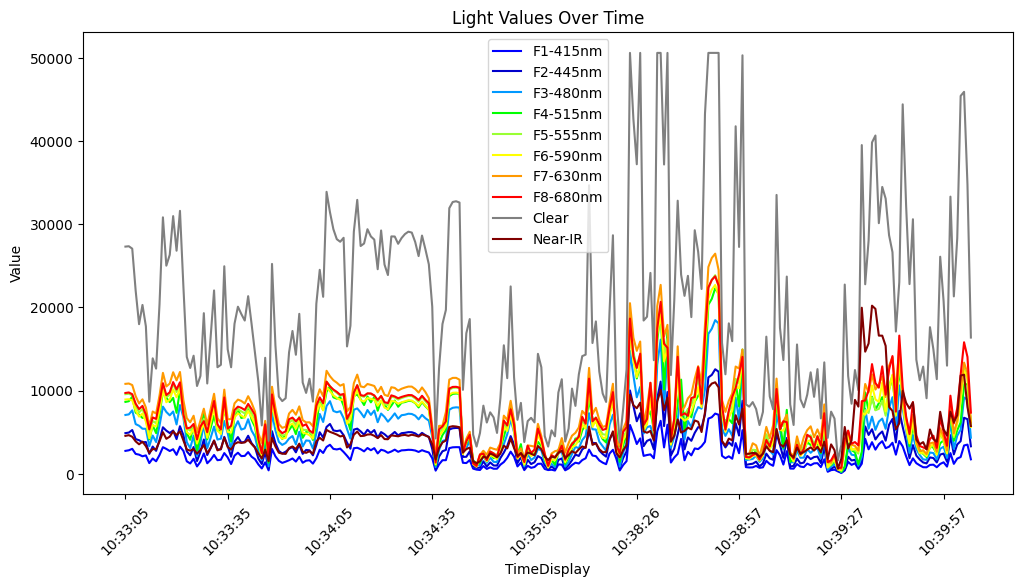

In [15]:
# Dictionary of the df column names as keys and the pandas rgb value associated with the mentioned wavelength of light:
color_dict = {
    'F1-415nm': '#0000FF',  # Blue
    'F2-445nm': '#0000CC',  # Dark Blue
    'F3-480nm': '#0099FF',  # Light Blue
    'F4-515nm': '#00FF00',  # Green
    'F5-555nm': '#99FF33',  # Light Green
    'F6-590nm': '#FFFF00',  # Yellow
    'F7-630nm': '#FF9900',  # Orange
    'F8-680nm': '#FF0000',  # Red
    'Clear': '#808080',     # Gray
    'Near-IR': '#800000'    # Maroon
}

print(df.head())

# Convert the TIME column to a standard timestamp format
#df['TimeStandard'] = pd.to_datetime(df['TIME'], format='%Y-%m-%dT%H:%M:%S:%fZ')
df['TimeStandard'] = pd.to_datetime(df['TIME'], format='%Y-%m-%dT%H:%M:%S:%fZ')

# Convert the TIME column to datetime format and create a new column with a more readable format
df['TimeDisplay'] = pd.to_datetime(df['TimeStandard']).dt.strftime('%H:%M:%S')

# Trim the rows to TimeDisplay values between 10:30:00 and 10:45:00
df = df[(df['TimeDisplay'] >= '10:31:00') & (df['TimeDisplay'] <= '10:45:30')]


# Line plot for the first column (assuming it's a timestamp)
plt.figure(figsize=(12, 6))

# colNamesToPlot = ["Clear", "F7-630nm", "F8-680nm"]
# colNamesToPlot = ["Clear"]
colNamesToPlot = ["F1-415nm", "F2-445nm", "F3-480nm", "F4-515nm", "F5-555nm", "F6-590nm", "F7-630nm", "F8-680nm", "Clear", "Near-IR"]

for colName in colNamesToPlot:
    plt.plot(df["TimeDisplay"], df[colName], label=colName, color=color_dict[colName])

plt.xlabel('TimeDisplay')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.ylabel('Value')
plt.title('Light Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()